# ***Radon Dataset***
## ***Code Explanation:***
- **Step1: Loading data**
- **Step2: Explore data**
  - Check data type 
  - Check data shape
  - Check missing data
  - Check relationship between independent variables and dependent variable by using visualization
  - Check correlation between independent variables and dependent variable
  - Check distribution of dependent variable (activity)
- **Step3: prepare data**
  - Delete some data
      - row deletion
        - eliminate samples that has missing data in basement column (750 observations were deleted)
      - column deletion
        - eliminate windoor column because there is missing data for the whole column
        - eliminate idnum column

        - eliminate zip column because there is not much relation with dependent variable. After deletion this column, nueral network model can be trained much faster as well. I also did experiment to verify that the performance of neural network model both with zip column and without zip column provide indifference mean abosulute error for validation dataset
  - Encoding categorical data to be dummy variables
  - Mean normalization for continuous independent variables        
  - Split data for train and test set
    - Shuffle data before spliting
    - 10,000 for training dataset
      - Using 5-folds cross validation -> 8,000 for training and 2,000 for validation each round
    - The rest is for testing dataset
- **Step4: Establishing architecture of neural network as a base model**
  - Sequential model
  - 2 hidden layers and 1 output layers
    - Hidden layer 1: 512 nodes, activition ='relu'
    - Hidden layer 2: 512 nodes, activation = 'relu'
    - Outout layer : 1 node, activation = 'linear'
  - optimizer = 'adam', loss='mse', metrics = 'mae'

- **Step5: Training base model of neural network**
  - Result is that the model tend to overfit quickly
  - Mean mean absulute error(MAE) of 5-folds cross validation is roughly 2.7-2.8
- **Step6: Evaluation with test set**
  - After evaluation with test set, MAE is roughly 2.7-2.8 
- **Step7: Improvement**
  - 12 methods were experimented for tuning hyperparameters
  - The architecture of nueral network that I think will probably provides the lowest MAE for testing dataset is in method 10 which has hyperparameters as followed.
  - Sequential model
  - 2 hidden layers and 1 output layers
    - Hidden layer 1: 512 nodes, activation = 'relu', both lasso and ridge reg.
    - with dropout rate = 0.5
    - Hidden layer 2: 512 nodes ,activation = 'relu, both lasso ans ridge reg.
    - with dropout rate = 0.5
    - Output layer : 1 node, activation = 'linear'
  - optimizer = 'rmsprop', loss='mse', metrics = 'mae'
  - with earlystoppeing patience = 4

  - **Note that**: Step 7 is a big part and takes too long to run all the codes because this part is about keeping changing hyperparameters and re-training model. Therefore, I suggest you run only method 7,8 and 10 since these three models seem to offer interesting results - can handle overfit and give lower MAE
- **Step8: Evaluate neural network model after tuning hyperparameters with test set**
  - Mean absolute error decreases from level 2.7-2.8 (base model) to level 2.1-2.2
  - In addition, overfitting problem seems to be alleviated
  - Overall, the result improves
- **Step9: Predict new data with tuned model**





# **Step1** Loading data

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
radon, info = tfds.load('radon',with_info= True,split='train')
df = tfds.as_dataframe(radon,info)
df.rename(columns = lambda x: x.replace('features/',""),inplace=True)
df.head()
radon = df.copy()

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='radon',
    version=1.0.0,
    description='Radon is a radioactive gas that enters homes through contact
points with the ground. It is a carcinogen that is the primary cause of lung
cancer in non-smokers. Radon levels vary greatly from household to household.
This dataset contains measured radon levels in U.S homes by county and state.
The 'activity' label is the measured radon concentration in pCi/L. Important
predictors are 'floor' (the floor of the house in which the measurement was
taken), 'county' (the U.S. county in which the house is located), and 'Uppm' (a
measurement of uranium level of the soil by county).',
    homepage='http://www.stat.columbia.edu/~gelman/arm/examples/radon/',
    features=FeaturesDict({
        'activity': tf.float32,
        'features': FeaturesDict({
            'Uppm': tf.float32,
            'adjwt': tf.float32,
            'basement': tf.string,
            'cntyfips': tf.int32,
            'county': tf.string,
      

# **Step2**: Explore data

check datatype

In [ ]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  12573 non-null  float64
 1   Uppm      12573 non-null  float64
 2   adjwt     12573 non-null  float64
 3   basement  12573 non-null  object 
 4   cntyfips  12573 non-null  int64  
 5   county    12573 non-null  object 
 6   dupflag   12573 non-null  int64  
 7   floor     12573 non-null  int64  
 8   idnum     12573 non-null  int64  
 9   lat       12573 non-null  float64
 10  lon       12573 non-null  float64
 11  pcterr    12573 non-null  float64
 12  region    12573 non-null  int64  
 13  rep       12573 non-null  int64  
 14  room      12573 non-null  int64  
 15  startdt   12573 non-null  int64  
 16  starttm   12573 non-null  int64  
 17  state     12573 non-null  object 
 18  state2    12573 non-null  object 
 19  stfips    12573 non-null  int64  
 20  st

check shape of data

In [ ]:
df.shape

(12573, 28)

Is there any missing value?

In [ ]:
df.isnull().sum()

activity    0
Uppm        0
adjwt       0
basement    0
cntyfips    0
county      0
dupflag     0
floor       0
idnum       0
lat         0
lon         0
pcterr      0
region      0
rep         0
room        0
startdt     0
starttm     0
state       0
state2      0
stfips      0
stopdt      0
stoptm      0
stratum     0
typebldg    0
wave        0
windoor     0
zip         0
zipflag     0
dtype: int64

In [ ]:
df.describe()

,activity,Uppm,adjwt,cntyfips,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,stfips,stopdt,stoptm,stratum,typebldg,wave,zip,zipflag
count,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000,12573.000000
mean,4.460781,1.974840,549.680147,67.093852,0.039291,0.525412,6290.000875,41.166813,-89.210849,13.376052,3.781516,2.776028,3.025690,40997.542591,1391.979082,27.734749,41231.099658,1407.326493,3.170126,1.037143,55.599539,44976.390917,0.000875
std,9.239971,0.726788,441.200038,77.167303,0.213413,1.374195,3634.821367,4.124453,12.299222,13.274920,2.323756,1.662104,1.786147,33124.239367,474.577432,12.297538,32702.448539,493.430449,3.625495,0.526701,34.132766,26113.586772,0.029567
min,0.000000,0.000000,2.081602,1.000000,0.000000,0.000000,1.000000,31.525999,-113.980003,0.000000,1.000000,-1.000000,0.000000,10188.000000,0.000000,4.000000,10188.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.100000,1.619770,288.889313,17.000000,0.000000,0.000000,3144.000000,39.007999,-96.369003,5.100000,2.000000,2.000000,2.000000,21989.000000,1000.000000,18.000000,22188.000000,1000.000000,1.000000,1.000000,31.000000,17601.000000,0.000000
50%,2.200000,2.007850,443.843689,45.000000,0.000000,0.000000,6287.000000,41.091000,-89.514999,9.800000,3.000000,3.000000,3.000000,31288.000000,1400.000000,27.000000,31488.000000,1405.000000,2.000000,1.000000,53.000000,54489.000000,0.000000
75%,4.800000,2.433430,710.826416,97.000000,0.000000,1.000000,9430.000000,43.978001,-79.087997,18.299999,5.000000,4.000000,4.000000,40488.000000,1800.000000,38.000000,40488.000000,1815.000000,4.000000,1.000000,81.000000,63116.000000,0.000000
max,273.500000,3.767130,2364.762695,510.000000,2.000000,9.000000,12777.000000,48.814999,-70.257004,490.399994,11.000000,5.000000,7.000000,123188.000000,2359.000000,55.000000,123188.000000,2359.000000,29.000000,5.000000,140.000000,86512.000000,1.000000


relationship among independent variables and dependent variable

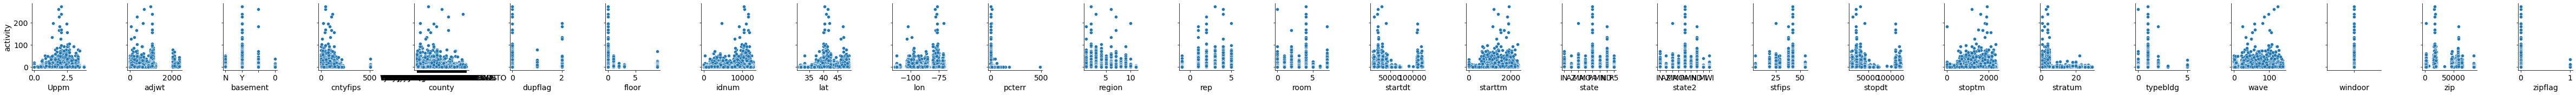

In [ ]:
import seaborn as sns
x_vars = df.columns.to_list()
x_vars.remove('activity')
# print(x_vars)
sns.pairplot(data=df,x_vars=x_vars,y_vars='activity')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


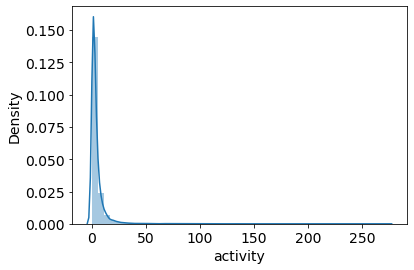

In [ ]:
sns.distplot(df['activity'])

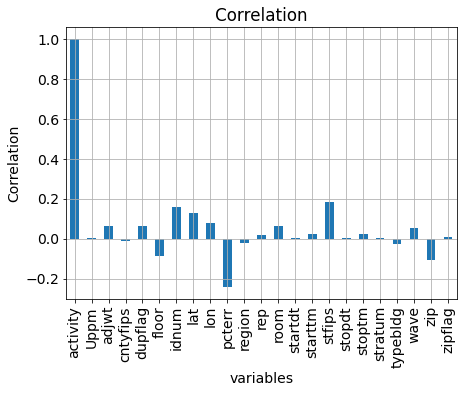

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})
df.corr().loc['activity'].plot(kind='bar',figsize=(7,5))
plt.xlabel('variables')
plt.ylabel('Correlation')
plt.title('Correlation')
plt.grid()
plt.show()

In [ ]:
df.sample(10)

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
846,1.8,2.018410,136.060974,b'Y',5,b'COCONINO ',0,0,123,35.839001,-111.769997,13.800000,1,2,4,121987,1000,b'AZ',b'AZ',4,122187,1000,1,1,36,b' ',86336,0
10160,4.8,1.686320,896.260681,b'Y',189,b'ST LOUIS ',0,0,7542,38.639999,-90.444000,8.700000,4,2,4,20288,1610,b'MO',b'MO',29,21088,1610,3,1,56,b' ',63088,0
723,0.4,0.853045,3.243590,b'N',53,b'LAC VIEUX DESERT ',0,1,11953,46.495998,-89.794998,0.000000,1,-1,3,22388,1045,b'R5',b'MI',26,22588,1045,2,2,-1,b' ',49969,0
10496,0.7,1.429560,625.019958,b'Y',23,b'PLYMOUTH ',0,0,4694,41.987000,-70.736000,23.799999,10,5,4,31988,1140,b'MA',b'MA',25,32188,1250,1,1,28,b' ',2333,0
6448,3.4,0.678591,3.697917,b'Y',125,b'LAC DU FLAMBEAU ',0,0,12413,46.053001,-89.514999,10.400000,4,-1,4,32388,1005,b'R5',b'WI',55,32588,1130,23,1,-1,b' ',54538,0
11673,0.3,0.869524,2.081602,b'Y',13,b'KEWEENAW BAY ',0,0,11885,46.700001,-88.351997,0.000000,1,-1,4,30388,1035,b'R5',b'MI',26,30388,1015,1,1,-1,b' ',49908,0
4465,1.3,3.433260,363.432068,b' ',19,b'PIMA ',0,1,1319,32.097000,-111.789001,14.200000,3,2,2,13088,800,b'AZ',b'AZ',4,20288,800,2,1,52,b' ',85737,0
7419,0.7,2.406330,120.341354,b'N',9,b'GRAHAM ',0,1,167,32.932999,-109.887001,31.500000,2,5,3,11888,700,b'AZ',b'AZ',4,12088,900,1,1,46,b' ',85546,0
8010,12.1,1.490110,1146.499146,b'Y',101,b'MURRAY ',0,0,5589,44.021999,-95.763000,5.000000,5,2,2,11688,2245,b'MN',b'MN',27,11888,2245,4,1,39,b' ',56123,0
4625,9.2,2.190610,57.057388,b'Y',7,b'BILLINGS ',0,0,7928,47.022999,-103.375999,3.500000,1,2,4,31188,900,b'ND',b'ND',38,31388,900,1,1,21,b' ',58622,0


In [ ]:
# check null data in string-type columns
columns = ['basement','county','state','state2','windoor']
count_null = {}
for column in columns:
  null_data = len(df[(df[column]==b' ')|(df[column]==b'0')])
  count_null[column]=null_data
count_null

{'basement': 750, 'county': 0, 'state': 0, 'state2': 0, 'windoor': 12573}

In [ ]:
750/df.shape[0]

0.05965163445478406

### missing data 
- basement columns = 750 -> 750/12573 = 5.96%
- windoor columns = 12573 -> 100%

In [ ]:
columns = df.columns
for column in columns:
  print('column {}: {} '.format(column,df[column].unique()))
  print('_______________________________________________________')
  print(' ')

column activity: [1.60000002e+00 5.00000000e-01 3.00000000e+00 6.00000024e-01
 1.20000005e+00 2.79999995e+00 1.50000000e+00 2.59999990e+00
 6.00000000e+00 4.50000000e+00 2.50000000e+00 1.08000002e+01
 4.00000006e-01 5.90000010e+00 1.29999995e+00 0.00000000e+00
 3.00000012e-01 2.00000003e-01 2.90000010e+00 8.99999976e-01
 3.20000005e+00 2.20000005e+00 1.79999995e+00 2.70000005e+00
 1.20000000e+01 1.21999998e+01 6.40000010e+00 1.39999998e+00
 8.00000012e-01 1.10000002e+00 3.40000010e+00 1.58000002e+01
 3.29999995e+00 2.00000000e+01 1.00000001e-01 5.09999990e+00
 3.09999990e+00 2.00000000e+00 8.30000019e+00 1.93999996e+01
 9.00000000e+00 1.38999996e+01 6.99999988e-01 3.42999992e+01
 4.09999990e+00 2.66000004e+01 1.10000000e+01 1.70000005e+00
 3.90000010e+00 1.33000002e+01 3.79999995e+00 1.89999998e+00
 7.00000000e+00 5.69999981e+00 8.60000038e+00 5.80000019e+00
 3.59999990e+00 2.63999996e+01 1.36999998e+01 7.59999990e+00
 3.50000000e+00 4.90000010e+00 2.09999990e+00 2.62000008e+01
 4.6999

# **Step3**: Preparing data
- 1) eliminate observation that has missing data 
  - 750 basement observations
  - delete columns windoor
- 2) delete columns that seems to be not relevant with activity of radon
  - zip
  - idnum
- 3) encoding string to dummy
- 4) mean-normalization for continuous x_variables N(0,1)


In [ ]:
# eliminate missing data in columns basement
drop_basement_ind = df.loc[(df['basement']==b' ')|(df['basement']==b'0')].index
df.drop(drop_basement_ind,inplace=True)

In [ ]:
df.shape

(11823, 28)

In [ ]:
# delete columns windoor 
df.drop('windoor',axis=1,inplace=True)

In [ ]:
df.shape

(11823, 27)

In [ ]:
# delete columns zip
df.drop('zip',axis=1,inplace=True) 
# drop zip ออกเนื่องจากเป็นตัวแปรที่ไม่ค่อยมีความสัมพันธ์กับ dependent variable(columns activity) เท่่าใดนัก โดยข้อดีของการ drop zip ทำให้สามารถ train model ได้เร็วขึ้น นอกจากนี้ได้ลองทำการใส่ zip column แล้ว cast เป็น dummy แล้ว
# พบว่าไม่ส่งผลให้ model ทำการ predict ได้แม่นยำขึ้นแต่อย่างใด

In [ ]:
df.shape

(11823, 26)

In [ ]:
df.drop('idnum',axis=1,inplace=True)

In [ ]:
df.shape

(11823, 25)

In [ ]:
df.head()

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,zipflag
0,1.6,2.49759,292.219543,b'N',3,b'ALLEN ',0,1,41.091000,-85.067001,12.7,2,3,2,11489,2230,b'IN',b'IN',18,11689,2235,2,1,92,0
1,0.5,2.66527,364.958313,b'N',25,b'YAVAPAI ',0,1,34.599998,-112.554001,0.0,2,5,2,22688,833,b'AZ',b'AZ',4,22888,1010,2,1,56,0
2,3.0,2.43343,626.564575,b'Y',17,b'MIDDLESEX ',0,0,42.485001,-71.391998,9.7,6,1,2,32288,1000,b'MA',b'MA',25,32488,1000,1,1,23,0
3,0.6,2.43343,570.611755,b'N',17,b'MIDDLESEX ',0,1,42.485001,-71.391998,27.6,6,3,3,32488,700,b'MA',b'MA',25,32688,1200,1,1,62,0
4,1.2,2.10811,426.798859,b'Y',95,b'JACKSON ',0,0,39.007999,-94.347000,23.5,1,3,4,32288,605,b'MO',b'MO',29,32488,610,2,1,91,0


### Prepareing Data (Cont.)
  - Mean Normalization for continuous independent variables
  - get dummies for categorical data

In [ ]:
# Mean Normalization: Only Continuous x_vars 
x_cont = ['Uppm','adjwt','lat','lon','pcterr','startdt','starttm','stopdt','stoptm','room','rep']
x_cat = ['basement','cntyfips','county','dupflag','floor','region','state','state2','stfips','stratum','typebldg','wave','zipflag'] # one hot encoder

for column in x_cont:
  mean = np.mean(df[column])
  sd = np.std(df[column])
  df[column] = (df[column] - mean)/sd
df.head()

for column in x_cat: # get dummies for category data
  df = pd.concat([df,pd.get_dummies(df[column],prefix='{}'.format(column))],axis=1)
  df.drop('{}'.format(column),axis=1,inplace=True)


In [ ]:
df.head()

,activity,Uppm,adjwt,lat,lon,pcterr,rep,room,startdt,starttm,stopdt,stoptm,basement_b'N',basement_b'Y',cntyfips_1,cntyfips_3,cntyfips_5,cntyfips_7,cntyfips_9,cntyfips_11,cntyfips_12,cntyfips_13,cntyfips_15,cntyfips_17,cntyfips_19,cntyfips_21,cntyfips_23,cntyfips_25,cntyfips_27,cntyfips_29,cntyfips_31,cntyfips_33,cntyfips_35,cntyfips_37,cntyfips_39,cntyfips_41,cntyfips_43,cntyfips_45,cntyfips_47,cntyfips_49,...,wave_103,wave_104,wave_105,wave_106,wave_107,wave_108,wave_109,wave_110,wave_111,wave_112,wave_113,wave_114,wave_115,wave_116,wave_117,wave_118,wave_119,wave_120,wave_121,wave_122,wave_123,wave_124,wave_125,wave_126,wave_127,wave_128,wave_129,wave_130,wave_131,wave_132,wave_133,wave_134,wave_135,wave_136,wave_137,wave_138,wave_139,wave_140,zipflag_0,zipflag_1
0,1.6,0.726155,-0.581888,-0.029971,0.334165,-0.044801,0.140030,-0.697079,-0.891380,1.770561,-0.903446,1.680747,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.5,0.956498,-0.417488,-1.608249,-1.917976,-1.009363,1.335392,-0.697079,-0.555491,-1.174687,-0.563236,-0.806374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.0,0.638017,0.173780,0.308978,1.454622,-0.272650,-1.055332,-0.697079,-0.267560,-0.822606,-0.271601,-0.826677,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.6,0.638017,0.047318,0.308978,1.454622,1.086851,0.140030,-0.106878,-0.261562,-1.455086,-0.265525,-0.420616,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.2,0.191123,-0.277720,-0.536450,-0.426190,0.775457,0.140030,0.483323,-0.267560,-1.655372,-0.271601,-1.618495,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(11823, 732)

### Split data for training and testing set
- shuffle data
- 10000 samples for training set
- the rest is testing set



In [ ]:
df = df.sample(frac=1).reset_index(drop=True) # shuffle data
print(df.head())
train = df.iloc[:10000,:]
test = df.iloc[10001:,:]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

X_columns = X_test.columns # for filtering validation set


   activity      Uppm     adjwt  ...  wave_140  zipflag_0  zipflag_1
0       2.1 -2.046313  1.257275  ...         0          1          0
1       4.2 -0.157428 -1.132000  ...         0          1          0
2       7.4  0.595707 -0.528627  ...         0          1          0
3       1.2  0.378826  0.107438  ...         0          1          0
4       3.3 -0.913694 -0.577631  ...         0          1          0

[5 rows x 732 columns]


# **Step4**: Setting Architecture of Neural Network Model (As a base model)


In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(512,activation='relu',input_shape=(X_test.shape[1],)))
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(1,activation='linear'))

  # compile model
  model.compile(optimizer='adam',loss='mse',metrics=['mae'])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 512)               374784    
_________________________________________________________________
dense_160 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 513       
Total params: 637,953
Trainable params: 637,953
Non-trainable params: 0
_________________________________________________________________


# **Step5**: Training neural network

- Using 5-folds cross validation (train and cross validation = 10,000 samples) and test set is the rest

In [ ]:
import time
k_folds = 5
num_epochs = 20
batchSize = 512
all_scores_mae = list()
all_scores_mse = list()
history_performance = dict()
for k in range(k_folds):
  start_time = time.time()
  print('This is round:{}'.format(k+1))
  sample_val = train.shape[0]//k_folds
  # x_val and y_val
  validation = train[sample_val*k:(k+1)*sample_val]
  x_val = validation[X_columns]
  y_val = validation[['activity']]
  valid_index = validation.index

  
  # train set
  train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
  train_xy = train.iloc[train_index]
  X_train = train_xy[X_columns]
  y_train = train_xy[['activity']]
  
  # training model
  model = build_model()
  history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1)
  history_performance[k+1] = history.history
  val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
  print('validation mae:',val_mae)
  print('validation mse:',val_mse)
  all_scores_mae.append(val_mae)
  all_scores_mse.append(val_mse)
  print(' ')
  print("--- %s seconds ---" % (time.time() - start_time))
  print('----------------------------------------')

This is round:1
Epoch 1/20
16/16 [==============================] - 1s 39ms/step - loss: 128.4995 - mae: 3.9108 - val_loss: 64.5714 - val_mae: 4.0641
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 75.2522 - mae: 3.6329 - val_loss: 57.6417 - val_mae: 3.1923
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 60.4314 - mae: 3.0523 - val_loss: 53.8221 - val_mae: 3.1926
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 77.1940 - mae: 3.0230 - val_loss: 50.9204 - val_mae: 2.9234
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 88.3746 - mae: 3.0213 - val_loss: 49.4181 - val_mae: 2.8140
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 48.5227 - mae: 2.6175 - val_loss: 48.2900 - val_mae: 2.9263
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 85.9301 - mae: 2.9013 - val_loss: 47.5541 - val_mae: 2.6606
Epoch 8/20
16/16 [==============================] - 

In [ ]:
df['activity'].describe()

count    11823.000000
mean         4.457320
std          8.952919
min          0.000000
25%          1.100000
50%          2.300000
75%          4.800000
max        273.500000
Name: activity, dtype: float64

In [ ]:
print('MAE:',all_scores_mae)
print('mean mae',np.mean(all_scores_mae))

MAE: [2.6454718112945557, 2.6232235431671143, 2.5412683486938477, 2.680272102355957, 2.759788990020752]
mean mae 2.6500049591064454


Round 1


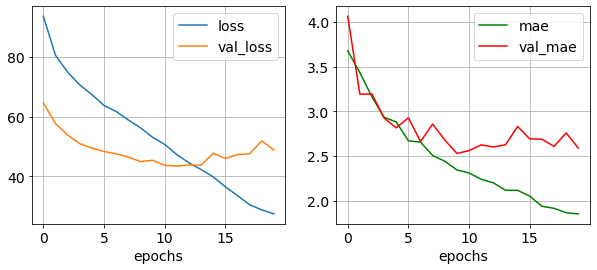

Round 2


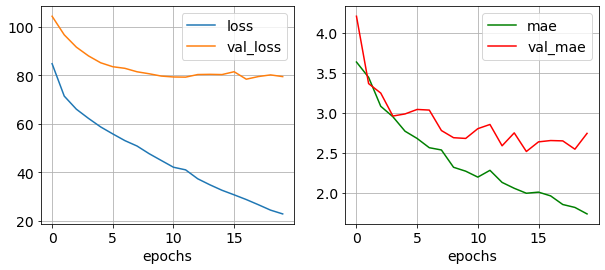

Round 3


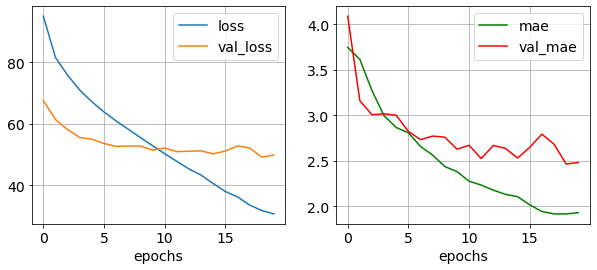

Round 4


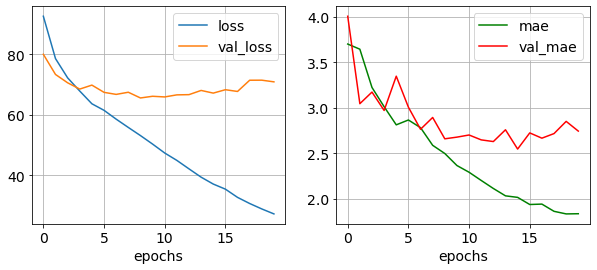

Round 5


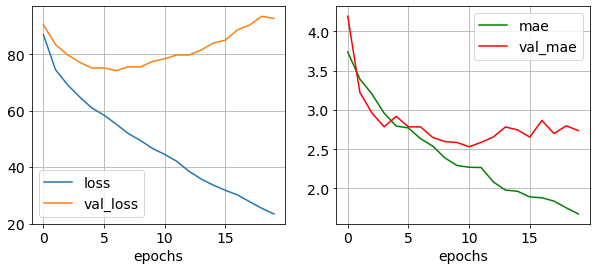

In [ ]:
for i in range(len(history_performance)):
  print('Round {}'.format(i+1))
  df_history = pd.DataFrame(history_performance[i+1])
  fig,ax = plt.subplots(1,2,figsize=(10,4))
  ax1 = plt.subplot(1,2,1)
  ax1.plot(df_history.index,df_history.loss,label='loss')
  ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
  ax1.set_xlabel('epochs')
  ax1.legend()
  ax1.grid()

  ax2 = plt.subplot(1,2,2)
  ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
  ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
  ax2.set_xlabel('epochs')
  ax2.grid()
  ax2.legend()
  plt.show()

# **Step6**: Evaluate model(base model) with testing set 

Epoch 1/20
20/20 [==============================] - 1s 35ms/step - loss: 93.1507 - mae: 3.7433 - val_loss: 77.9022 - val_mae: 4.0212
Epoch 2/20
20/20 [==============================] - 0s 22ms/step - loss: 86.4093 - mae: 3.4772 - val_loss: 69.7282 - val_mae: 3.3468
Epoch 3/20
20/20 [==============================] - 0s 22ms/step - loss: 57.4434 - mae: 2.8546 - val_loss: 63.6493 - val_mae: 3.1582
Epoch 4/20
20/20 [==============================] - 0s 23ms/step - loss: 59.5386 - mae: 2.8726 - val_loss: 60.6443 - val_mae: 2.9640
Epoch 5/20
20/20 [==============================] - 0s 22ms/step - loss: 71.0677 - mae: 2.7431 - val_loss: 58.1490 - val_mae: 3.0466
Epoch 6/20
20/20 [==============================] - 0s 22ms/step - loss: 55.3519 - mae: 2.6061 - val_loss: 57.4784 - val_mae: 2.6431
Epoch 7/20
20/20 [==============================] - 0s 22ms/step - loss: 58.1492 - mae: 2.3967 - val_loss: 55.7018 - val_mae: 2.6011
Epoch 8/20
20/20 [==============================] - 0s 22ms/step - lo

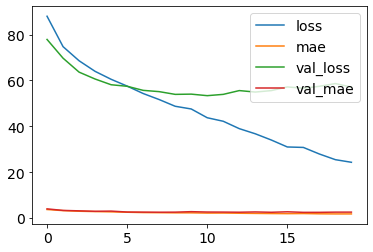

In [ ]:
X_train = train.loc[:,X_columns]
y_train = train.loc[:,'activity']
model = build_model()
k_folds = 5
num_epochs = 20
batchSize = 512
history = model.fit(X_train,y_train,batch_size = batchSize,validation_data = (X_test,y_test) ,epochs = num_epochs,verbose=1)
pd.DataFrame(history.history).plot()
# evaluate model
test_mse, test_mae = model.evaluate(X_test,y_test,verbose = 0)
print('test mae:',test_mae)
print('test mse:',test_mse)

# **Step7**: Model Improvement
- According to the base model. It seems that the model has 2 major problems
- 1) The model seems to be overfit quickly
- 2) validation MAE is still high 

# Method 1:
- Change nodes in each layer to 256 to reduce overfit
- Change epochs from 20 to 40
- Using Early Stopping for detecting overfitting

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(256,activation='relu',input_shape=(X_test.shape[1],)))
#   model.add(layers.Dense(256,activation='relu'))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#   return model
# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 3, # 3 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 1s 36ms/step - loss: 91.6778 - mae: 3.8583 - val_loss: 59.8000 - val_mae: 4.1318
Epoch 2/40
16/16 [==============================] - 0s 22ms/step - loss: 74.3035 - mae: 3.7062 - val_loss: 53.8065 - val_mae: 3.1977
Epoch 3/40
16/16 [==============================] - 0s 21ms/step - loss: 48.0338 - mae: 3.0108 - val_loss: 50.7703 - val_mae: 3.1978
Epoch 4/40
16/16 [==============================] - 0s 22ms/step - loss: 63.8989 - mae: 3.0115 - val_loss: 47.9164 - val_mae: 2.8804
Epoch 5/40
16/16 [==============================] - 0s 22ms/step - loss: 60.9467 - mae: 2.7377 - val_loss: 46.2609 - val_mae: 2.8847
Epoch 6/40
16/16 [==============================] - 0s 21ms/step - loss: 41.5213 - mae: 2.5246 - val_loss: 45.9847 - val_mae: 3.0930
Epoch 7/40
16/16 [==============================] - 0s 22ms/step - loss: 52.9423 - mae: 2.7306 - val_loss: 44.5554 - val_mae: 2.9018
Epoch 8/40
16/16 [==============================] - 0

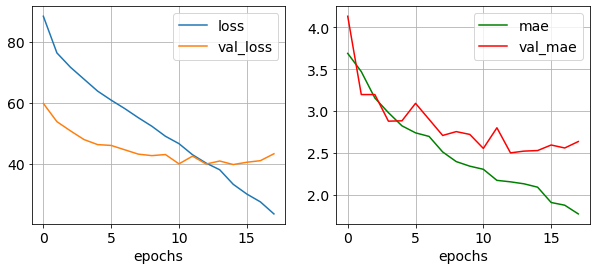

Round 2


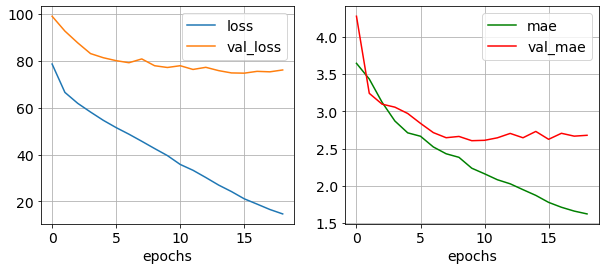

Round 3


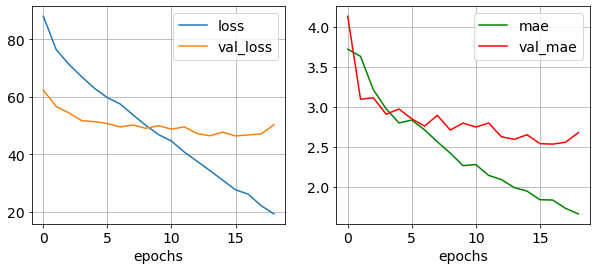

Round 4


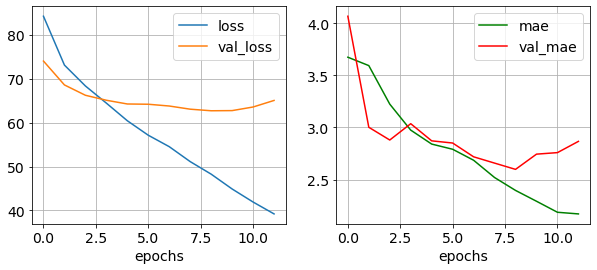

Round 5


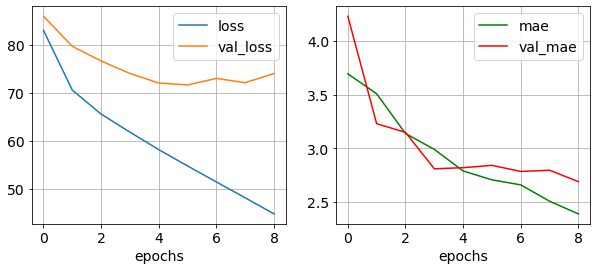

In [ ]:
# import time
# k_folds = 5
# num_epochs = 40
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')

# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

In summary Method 1:
- Set node in each layers 256
- Change epoch from 20 to 40 for (traning longer)
- The model still seems to be overfit
- And MAE doesn't decrease. (Still around 2.66)
- Therefore, **it doesn't work**

# Method 2:
- Setting nodes at 512
- Epochs 40 with Early Stopping
- Regularization (L2 Ridge Regularization)


In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01),input_shape=(X_test.shape[1],)))
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#   return model
# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 3, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 1s 60ms/step - loss: 106.2916 - mae: 3.8128 - val_loss: 64.3910 - val_mae: 3.4222
Epoch 2/40
16/16 [==============================] - 1s 44ms/step - loss: 70.7888 - mae: 3.1075 - val_loss: 57.4614 - val_mae: 3.2749
Epoch 3/40
16/16 [==============================] - 1s 44ms/step - loss: 87.4211 - mae: 3.1328 - val_loss: 52.7351 - val_mae: 2.9971
Epoch 4/40
16/16 [==============================] - 1s 44ms/step - loss: 64.5548 - mae: 2.6513 - val_loss: 51.0776 - val_mae: 2.9884
Epoch 5/40
16/16 [==============================] - 1s 45ms/step - loss: 70.6275 - mae: 2.7663 - val_loss: 48.6043 - val_mae: 2.7431
Epoch 6/40
16/16 [==============================] - 1s 44ms/step - loss: 64.8606 - mae: 2.4995 - val_loss: 47.0947 - val_mae: 2.5587
Epoch 7/40
16/16 [==============================] - 1s 45ms/step - loss: 50.8116 - mae: 2.3022 - val_loss: 48.1391 - val_mae: 2.9016
Epoch 8/40
16/16 [==============================] - 

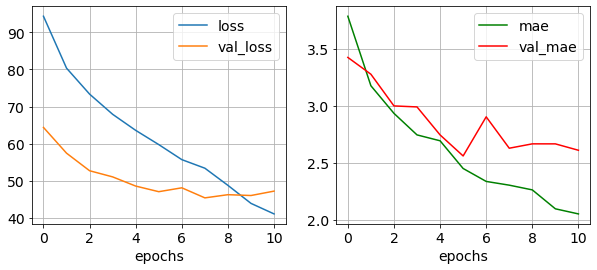

Round 2


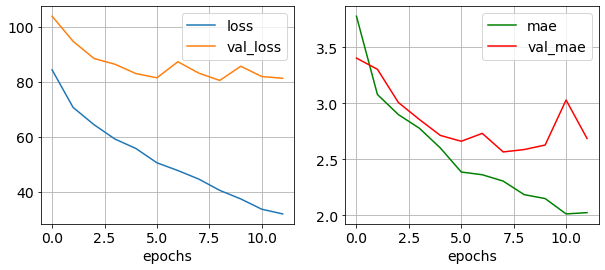

Round 3


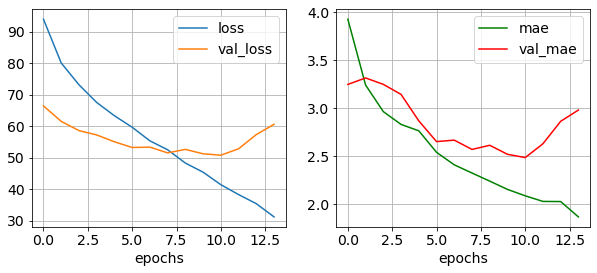

Round 4


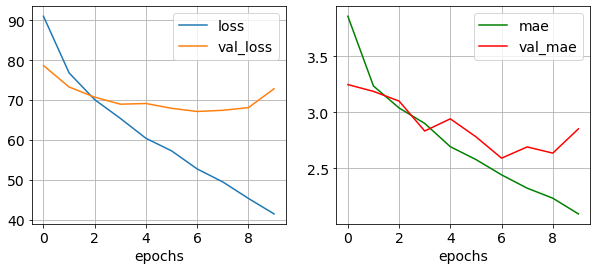

Round 5


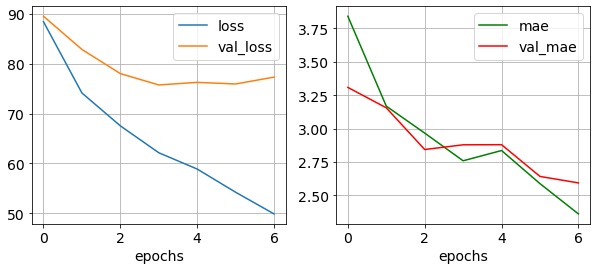

MAE: [2.6085586547851562, 2.6858971118927, 2.98366117477417, 2.8517792224884033, 2.594053268432617]
mean mae 2.744789886474609


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 40
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

# Method 3:
- Setting nodes at 512
- Epochs 40 with Early Stopping
- kernel_initializer ='he_normal'
- kernel_regularizers = l2

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='relu',kernel_initializer ='he_normal',kernel_regularizer=keras.regularizers.l2(0.01),input_shape=(X_test.shape[1],)))
#   model.add(layers.Dense(512,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.01)))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#   return model

# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 3, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 1s 63ms/step - loss: 93.9843 - mae: 3.7807 - val_loss: 72.0531 - val_mae: 3.2311
Epoch 2/40
16/16 [==============================] - 1s 44ms/step - loss: 80.0757 - mae: 3.1261 - val_loss: 63.7362 - val_mae: 3.1056
Epoch 3/40
16/16 [==============================] - 1s 45ms/step - loss: 65.0929 - mae: 2.9178 - val_loss: 59.1848 - val_mae: 3.1329
Epoch 4/40
16/16 [==============================] - 1s 43ms/step - loss: 87.7137 - mae: 2.9656 - val_loss: 55.7060 - val_mae: 2.7441
Epoch 5/40
16/16 [==============================] - 1s 43ms/step - loss: 67.2763 - mae: 2.5287 - val_loss: 52.6729 - val_mae: 2.6247
Epoch 6/40
16/16 [==============================] - 1s 45ms/step - loss: 50.4314 - mae: 2.2663 - val_loss: 50.8715 - val_mae: 2.6684
Epoch 7/40
16/16 [==============================] - 1s 45ms/step - loss: 47.3965 - mae: 2.2505 - val_loss: 49.0651 - val_mae: 2.5999
Epoch 8/40
16/16 [==============================] - 1

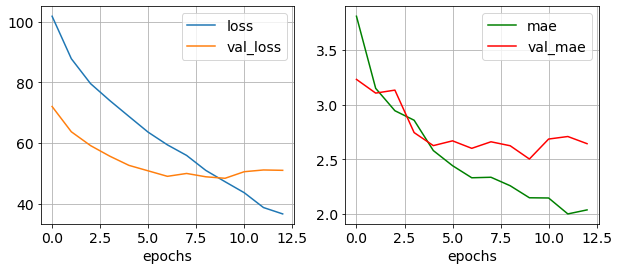

Round 2


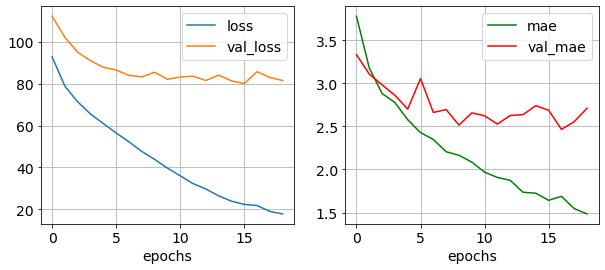

Round 3


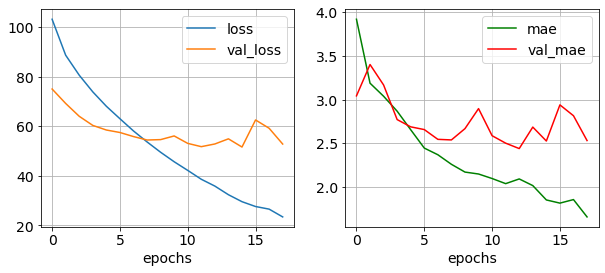

Round 4


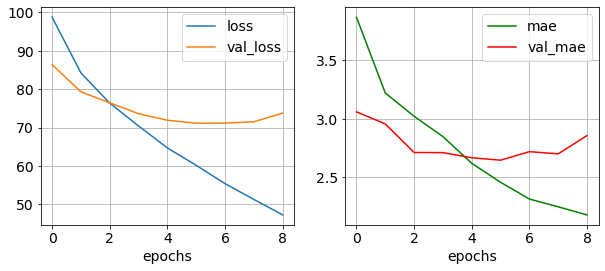

Round 5


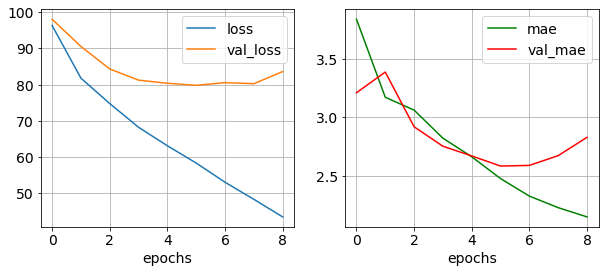

MAE: [2.642507553100586, 2.7121310234069824, 2.5306453704833984, 2.8567392826080322, 2.8286070823669434]
mean mae 2.7141260623931887


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 40
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

# Method 4: Try using drop out without regularization
- Setting nodes at 512
- Epochs 40 with Early Stopping
- Drop out rate = 0.2

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='relu',input_shape=(X_test.shape[1],)))
#   model.add(layers.Dropout(rate=0.2))
#   model.add(layers.Dense(512,activation='relu'))
#   model.add(layers.Dropout(rate=0.2))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#   return model

  
# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 3, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 1s 64ms/step - loss: 77.6014 - mae: 3.8311 - val_loss: 56.2975 - val_mae: 3.3984
Epoch 2/40
16/16 [==============================] - 1s 50ms/step - loss: 77.4915 - mae: 3.2252 - val_loss: 51.3137 - val_mae: 3.0745
Epoch 3/40
16/16 [==============================] - 1s 49ms/step - loss: 56.2099 - mae: 2.9281 - val_loss: 47.7166 - val_mae: 3.0652
Epoch 4/40
16/16 [==============================] - 1s 48ms/step - loss: 59.2157 - mae: 2.8475 - val_loss: 45.4644 - val_mae: 2.8401
Epoch 5/40
16/16 [==============================] - 1s 47ms/step - loss: 46.3284 - mae: 2.6171 - val_loss: 43.8943 - val_mae: 2.7660
Epoch 6/40
16/16 [==============================] - 1s 50ms/step - loss: 41.1884 - mae: 2.4862 - val_loss: 42.7670 - val_mae: 2.6990
Epoch 7/40
16/16 [==============================] - 1s 48ms/step - loss: 47.3237 - mae: 2.3684 - val_loss: 41.1148 - val_mae: 2.6557
Epoch 8/40
16/16 [==============================] - 1

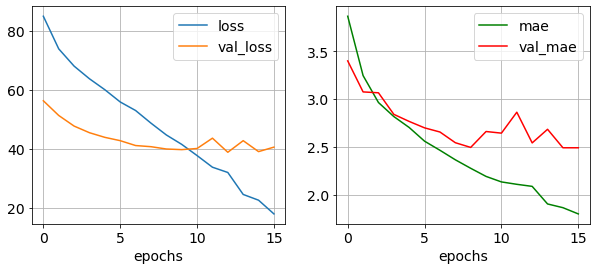

Round 2


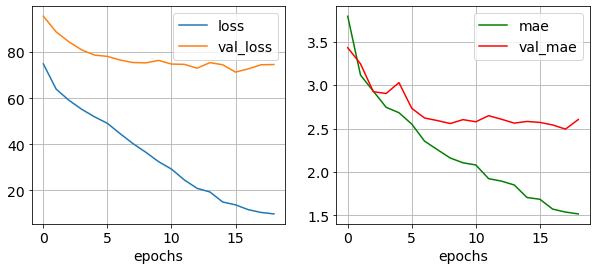

Round 3


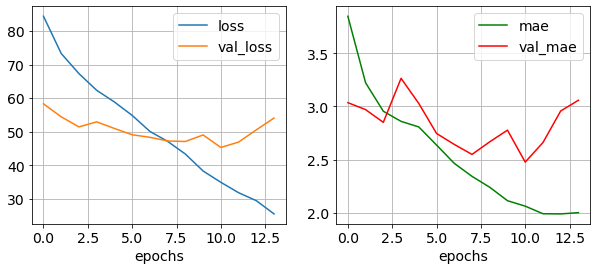

Round 4


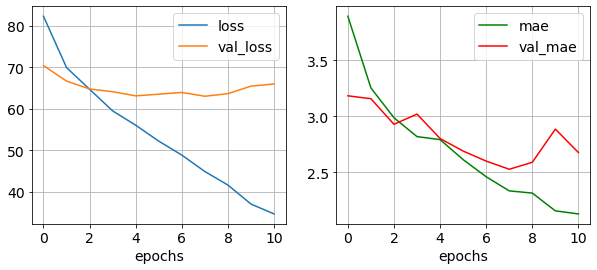

Round 5


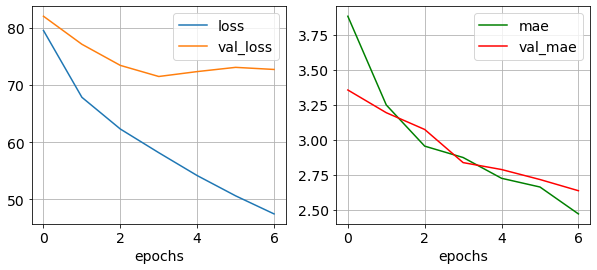

MAE: [2.490920305252075, 2.603437662124634, 3.0575785636901855, 2.6765968799591064, 2.636897563934326]
mean mae 2.6930861949920653


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 40
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

# Method 5: Try using drop out rate = 0.5
- Setting nodes at 512
- Epochs 40 with Early Stopping
- Drop out rate = 0.5

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='relu',input_shape=(X_test.shape[1],)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(512,activation='relu'))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#   return model


# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 3, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 1s 65ms/step - loss: 105.1562 - mae: 3.9336 - val_loss: 56.5662 - val_mae: 3.3256
Epoch 2/40
16/16 [==============================] - 1s 51ms/step - loss: 73.7487 - mae: 3.1733 - val_loss: 51.8762 - val_mae: 3.2025
Epoch 3/40
16/16 [==============================] - 1s 49ms/step - loss: 76.8958 - mae: 3.0082 - val_loss: 48.6661 - val_mae: 3.0534
Epoch 4/40
16/16 [==============================] - 1s 46ms/step - loss: 71.4396 - mae: 2.9627 - val_loss: 47.0537 - val_mae: 3.0889
Epoch 5/40
16/16 [==============================] - 1s 48ms/step - loss: 48.4467 - mae: 2.7891 - val_loss: 45.4821 - val_mae: 2.9330
Epoch 6/40
16/16 [==============================] - 1s 49ms/step - loss: 75.2343 - mae: 2.9022 - val_loss: 44.9590 - val_mae: 2.7509
Epoch 7/40
16/16 [==============================] - 1s 49ms/step - loss: 52.7285 - mae: 2.5999 - val_loss: 43.2083 - val_mae: 2.7225
Epoch 8/40
16/16 [==============================] - 

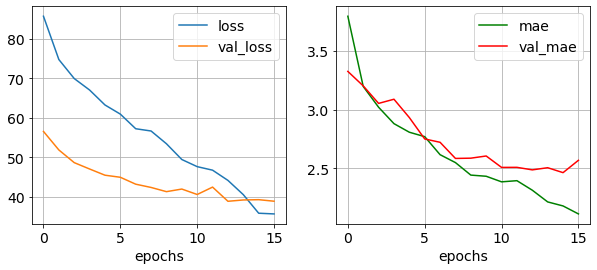

Round 2


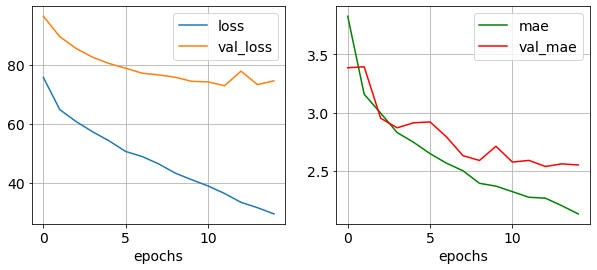

Round 3


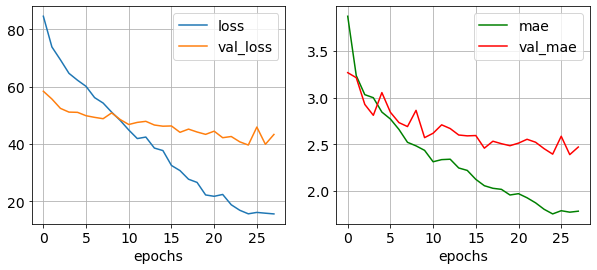

Round 4


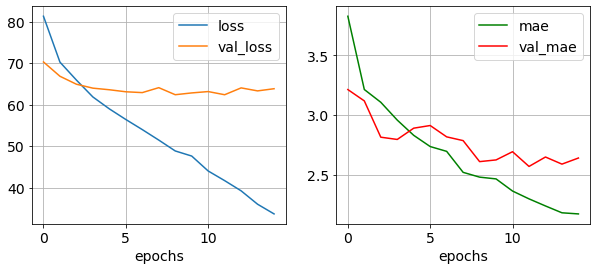

Round 5


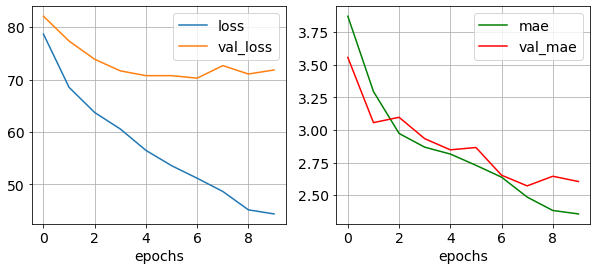

MAE: [2.569275140762329, 2.549318552017212, 2.471067190170288, 2.6388235092163086, 2.604560136795044]
mean mae 2.5666089057922363


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 40
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

### Note that after setting dropout rate = 0.5, MAE obviously improve. Mean MAE is at 2.52-2.56 while mean MAE of the previous methods are around 2.70

#  Method 6: Dropout rate = 0.5 and Ridge Regularization l2 (0.01)

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01),input_shape=(X_test.shape[1],)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#   return model

# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 3, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 2s 68ms/step - loss: 103.3904 - mae: 3.8940 - val_loss: 65.1343 - val_mae: 3.3233
Epoch 2/40
16/16 [==============================] - 1s 50ms/step - loss: 60.9635 - mae: 3.0913 - val_loss: 59.2248 - val_mae: 3.2887
Epoch 3/40
16/16 [==============================] - 1s 51ms/step - loss: 77.5519 - mae: 3.2115 - val_loss: 55.0199 - val_mae: 2.8722
Epoch 4/40
16/16 [==============================] - 1s 51ms/step - loss: 80.7409 - mae: 2.9062 - val_loss: 52.5256 - val_mae: 3.0017
Epoch 5/40
16/16 [==============================] - 1s 50ms/step - loss: 59.7522 - mae: 2.7771 - val_loss: 50.7664 - val_mae: 2.9281
Epoch 6/40
16/16 [==============================] - 1s 50ms/step - loss: 80.4329 - mae: 2.9662 - val_loss: 49.5335 - val_mae: 2.7550
Epoch 7/40
16/16 [==============================] - 1s 50ms/step - loss: 60.5174 - mae: 2.6142 - val_loss: 48.2290 - val_mae: 2.6136
Epoch 8/40
16/16 [==============================] - 

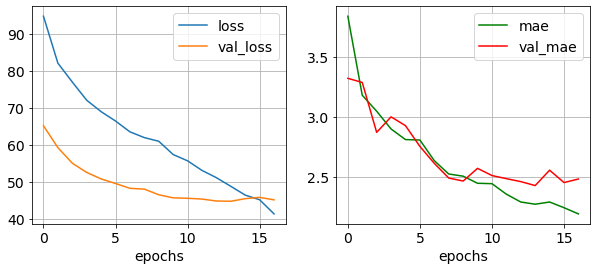

Round 2


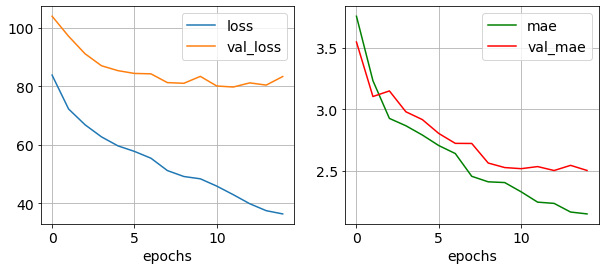

Round 3


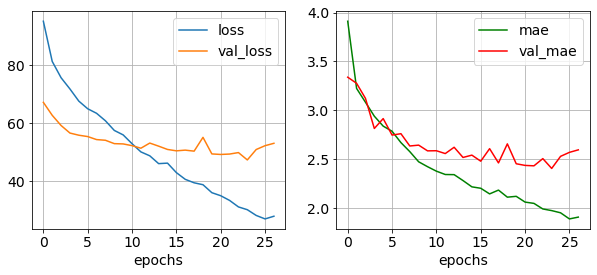

Round 4


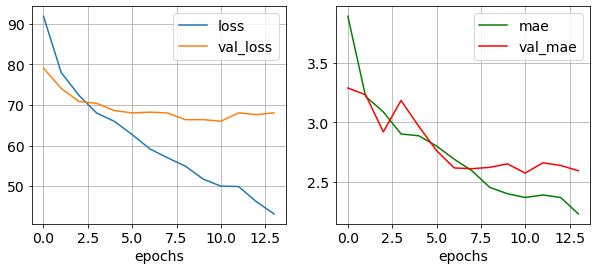

Round 5


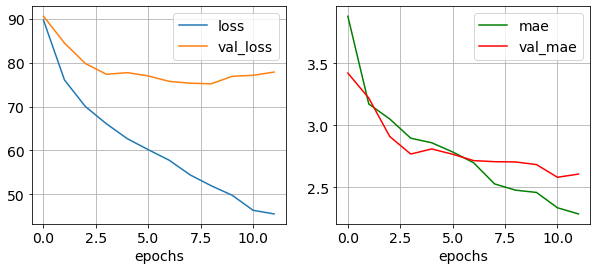

MAE: [2.4830756187438965, 2.5041985511779785, 2.5972001552581787, 2.592787742614746, 2.6064834594726562]
mean mae 2.556749105453491


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 40
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

### Note: by using dropout rate = 0.5 and ridge regularization (0.01). The performance doesn't improve. Mean MAE is still at 2.55 

# Method 7: Dropout rate = 0.5 and Lasso Regularization l1 (0.01)

In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1(0.01),input_shape=(X_test.shape[1],)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1(0.01)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(1,activation='linear'))

  # compile model
  model.compile(optimizer='adam',loss='mse',metrics=['mae'])
  return model

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor ='val_loss',
                          min_delta=0,
                          patience = 4, # 5 rounds that val_loss never get lower, then stop training
                          verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 2s 67ms/step - loss: 307.1492 - mae: 3.8433 - val_loss: 216.1043 - val_mae: 3.4896
Epoch 2/40
16/16 [==============================] - 1s 51ms/step - loss: 213.5089 - mae: 3.3334 - val_loss: 154.6569 - val_mae: 3.2856
Epoch 3/40
16/16 [==============================] - 1s 50ms/step - loss: 147.5828 - mae: 3.1299 - val_loss: 110.9828 - val_mae: 3.1931
Epoch 4/40
16/16 [==============================] - 1s 52ms/step - loss: 122.7763 - mae: 3.0649 - val_loss: 84.9299 - val_mae: 2.9726
Epoch 5/40
16/16 [==============================] - 1s 52ms/step - loss: 90.1568 - mae: 2.9440 - val_loss: 73.4031 - val_mae: 2.9393
Epoch 6/40
16/16 [==============================] - 1s 51ms/step - loss: 81.6481 - mae: 2.8004 - val_loss: 67.3740 - val_mae: 3.0076
Epoch 7/40
16/16 [==============================] - 1s 52ms/step - loss: 89.7523 - mae: 2.9404 - val_loss: 63.8373 - val_mae: 2.8759
Epoch 8/40
16/16 [============================

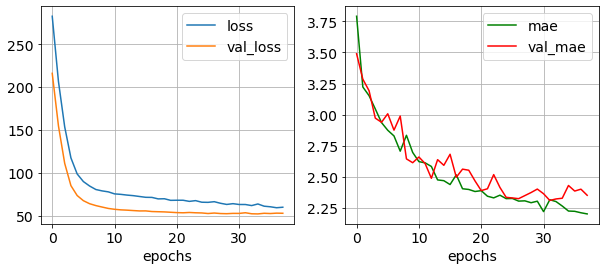

Round 2


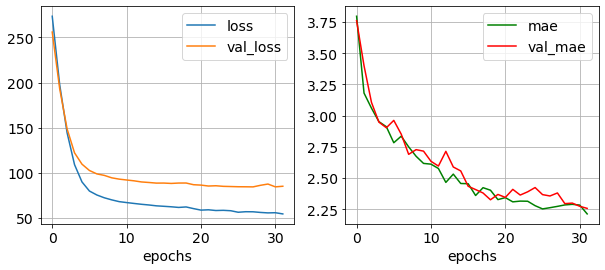

Round 3


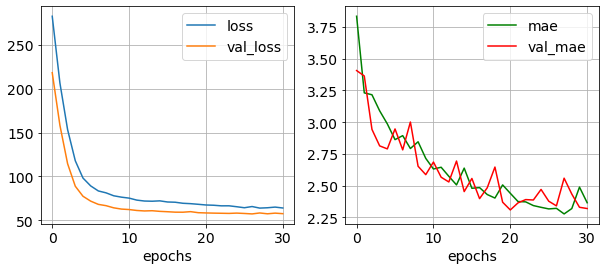

Round 4


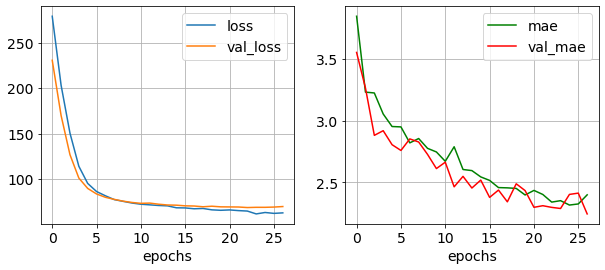

Round 5


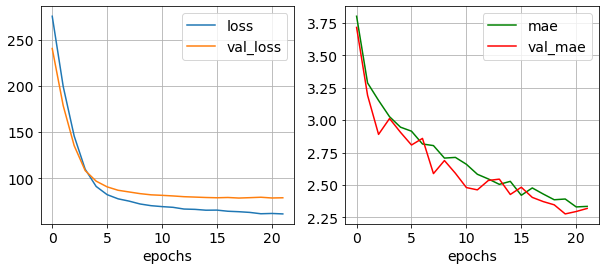

MAE: [2.352465867996216, 2.2566072940826416, 2.3204994201660156, 2.2430756092071533, 2.3183321952819824]
mean mae 2.2981960773468018


In [ ]:
import time
import keras
k_folds = 5
num_epochs = 40
batchSize = 512
all_scores_mae = list()
all_scores_mse = list()
history_performance = dict()
for k in range(k_folds):
  start_time = time.time()
  print('This is round:{}'.format(k+1))
  sample_val = train.shape[0]//k_folds
  # x_val and y_val
  validation = train[sample_val*k:(k+1)*sample_val]
  x_val = validation[X_columns]
  y_val = validation[['activity']]
  valid_index = validation.index

  
  # train set
  train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
  train_xy = train.iloc[train_index]
  X_train = train_xy[X_columns]
  y_train = train_xy[['activity']]
  
  # training model
  model = build_model()
  history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
  history_performance[k+1] = history.history
  val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
  print('validation mae:',val_mae)
  print('validation mse:',val_mse)
  all_scores_mae.append(val_mae)
  all_scores_mse.append(val_mse)
  print(' ')
  print("--- %s seconds ---" % (time.time() - start_time))
  print('----------------------------------------')
# Plotting Graph
for i in range(len(history_performance)):
  print('Round {}'.format(i+1))
  df_history = pd.DataFrame(history_performance[i+1])
  fig,ax = plt.subplots(1,2,figsize=(10,4))
  ax1 = plt.subplot(1,2,1)
  ax1.plot(df_history.index,df_history.loss,label='loss')
  ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
  ax1.set_xlabel('epochs')
  ax1.legend()
  ax1.grid()

  ax2 = plt.subplot(1,2,2)
  ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
  ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
  ax2.set_xlabel('epochs')
  ax2.grid()
  ax2.legend()
  plt.show()
# Mean MAE
print('MAE:',all_scores_mae)
print('mean mae',np.mean(all_scores_mae))

### By using Lasso Regularization and Dropout rate = 0.5, the performance improve quite siginificantly. Mean MAE is now at around 2.3
- Also, using Lasso Regularization clearly alleviates overfitting problem

# Method 8: Now using Both Lasso and Ridge Regularization and Dropout rate = 0.5

In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01),input_shape=(X_test.shape[1],)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(1,activation='linear'))

  # compile model
  model.compile(optimizer='adam',loss='mse',metrics=['mae'])
  return model

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor ='val_loss',
                          min_delta=0,
                          patience = 4, # 5 rounds that val_loss never get lower, then stop training
                          verbose = 1)

This is round:1
Epoch 1/40
16/16 [==============================] - 2s 74ms/step - loss: 320.0472 - mae: 3.7848 - val_loss: 221.0069 - val_mae: 3.6167
Epoch 2/40
16/16 [==============================] - 1s 53ms/step - loss: 225.7180 - mae: 3.3341 - val_loss: 155.2771 - val_mae: 3.2935
Epoch 3/40
16/16 [==============================] - 1s 52ms/step - loss: 178.0086 - mae: 3.3103 - val_loss: 110.1907 - val_mae: 2.8682
Epoch 4/40
16/16 [==============================] - 1s 53ms/step - loss: 120.4137 - mae: 3.0196 - val_loss: 83.4251 - val_mae: 2.8449
Epoch 5/40
16/16 [==============================] - 1s 55ms/step - loss: 110.1327 - mae: 2.9412 - val_loss: 71.8057 - val_mae: 2.8221
Epoch 6/40
16/16 [==============================] - 1s 52ms/step - loss: 81.2666 - mae: 2.7933 - val_loss: 65.7512 - val_mae: 2.9194
Epoch 7/40
16/16 [==============================] - 1s 53ms/step - loss: 104.1269 - mae: 2.9310 - val_loss: 62.4528 - val_mae: 2.7763
Epoch 8/40
16/16 [==========================

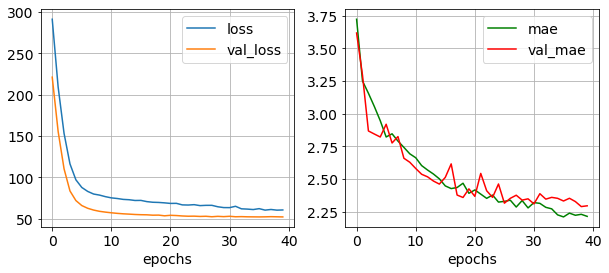

Round 2


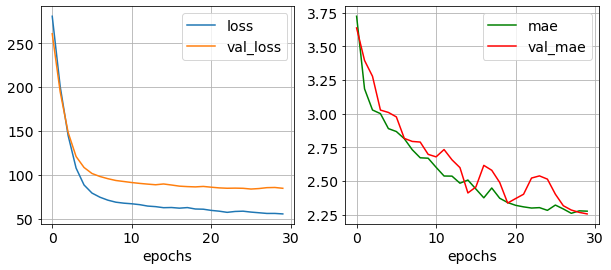

Round 3


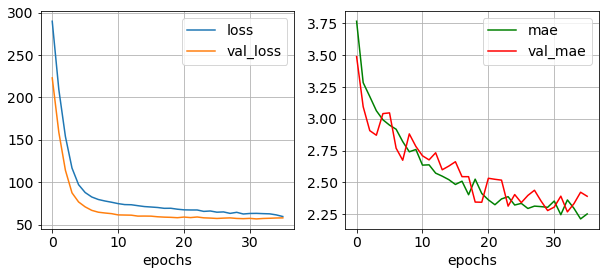

Round 4


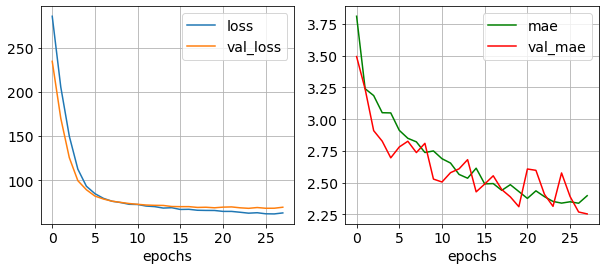

Round 5


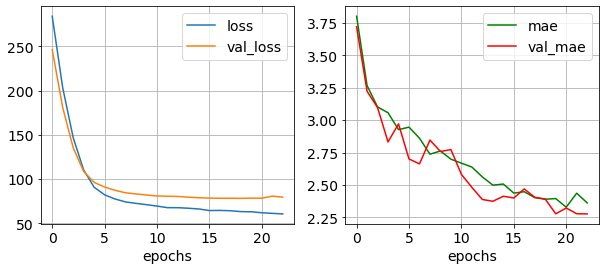

MAE: [2.2962987422943115, 2.256859064102173, 2.3899693489074707, 2.2545416355133057, 2.276883840560913]
mean mae 2.294910526275635


In [ ]:
import time
import keras
k_folds = 5
num_epochs = 40
batchSize = 512
all_scores_mae = list()
all_scores_mse = list()
history_performance = dict()
for k in range(k_folds):
  start_time = time.time()
  print('This is round:{}'.format(k+1))
  sample_val = train.shape[0]//k_folds
  # x_val and y_val
  validation = train[sample_val*k:(k+1)*sample_val]
  x_val = validation[X_columns]
  y_val = validation[['activity']]
  valid_index = validation.index

  
  # train set
  train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
  train_xy = train.iloc[train_index]
  X_train = train_xy[X_columns]
  y_train = train_xy[['activity']]
  
  # training model
  model = build_model()
  history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
  history_performance[k+1] = history.history
  val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
  print('validation mae:',val_mae)
  print('validation mse:',val_mse)
  all_scores_mae.append(val_mae)
  all_scores_mse.append(val_mse)
  print(' ')
  print("--- %s seconds ---" % (time.time() - start_time))
  print('----------------------------------------')
# Plotting Graph
for i in range(len(history_performance)):
  print('Round {}'.format(i+1))
  df_history = pd.DataFrame(history_performance[i+1])
  fig,ax = plt.subplots(1,2,figsize=(10,4))
  ax1 = plt.subplot(1,2,1)
  ax1.plot(df_history.index,df_history.loss,label='loss')
  ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
  ax1.set_xlabel('epochs')
  ax1.legend()
  ax1.grid()

  ax2 = plt.subplot(1,2,2)
  ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
  ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
  ax2.set_xlabel('epochs')
  ax2.grid()
  ax2.legend()
  plt.show()
# Mean MAE
print('MAE:',all_scores_mae)
print('mean mae',np.mean(all_scores_mae))

# The performance of the model with using both Lasso and Ridge seems to be at the same level of using only Lasso Reg. Mean MAE is around 2.30. Overfit problem is alleviated

# Next goal is to design network which can achieve lowest val_MAE.

# Method 9: Relu to Elu
- change relu to elu
- dropout rate = 0.5
- using Lasso Reg
- epochs = 100
- with Early Stopping (patience = 4)

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='elu',kernel_regularizer=keras.regularizers.l1_l2(0.01),input_shape=(X_test.shape[1],)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(512,activation='elu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='adam',loss='mse',metrics=['mae'])
#   return model

# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 4, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/100
16/16 [==============================] - 2s 74ms/step - loss: 308.8793 - mae: 3.7957 - val_loss: 228.3082 - val_mae: 3.2234
Epoch 2/100
16/16 [==============================] - 1s 55ms/step - loss: 240.3125 - mae: 3.3079 - val_loss: 171.3823 - val_mae: 3.2769
Epoch 3/100
16/16 [==============================] - 1s 56ms/step - loss: 159.4121 - mae: 3.0229 - val_loss: 130.0886 - val_mae: 3.6235
Epoch 4/100
16/16 [==============================] - 1s 57ms/step - loss: 131.3819 - mae: 3.4420 - val_loss: 102.4194 - val_mae: 3.3973
Epoch 5/100
16/16 [==============================] - 1s 57ms/step - loss: 132.4545 - mae: 3.6206 - val_loss: 88.0411 - val_mae: 3.1202
Epoch 6/100
16/16 [==============================] - 1s 56ms/step - loss: 108.5714 - mae: 3.2451 - val_loss: 78.7486 - val_mae: 3.1739
Epoch 7/100
16/16 [==============================] - 1s 55ms/step - loss: 95.7641 - mae: 3.2262 - val_loss: 72.7751 - val_mae: 3.2067
Epoch 8/100
16/16 [=================

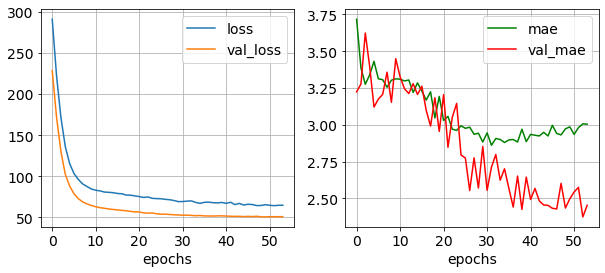

Round 2


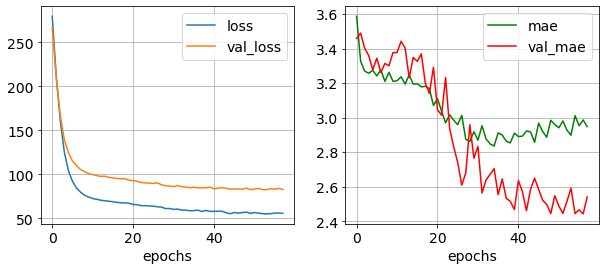

Round 3


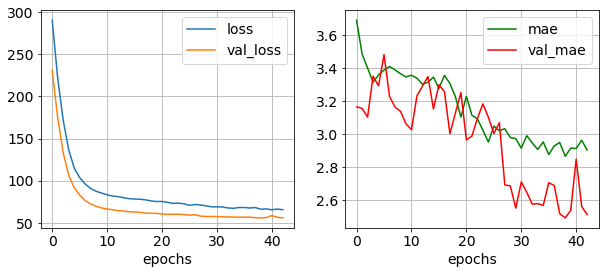

Round 4


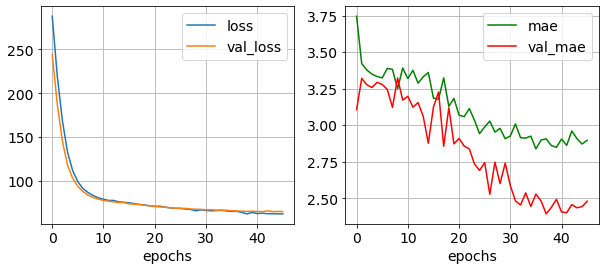

Round 5


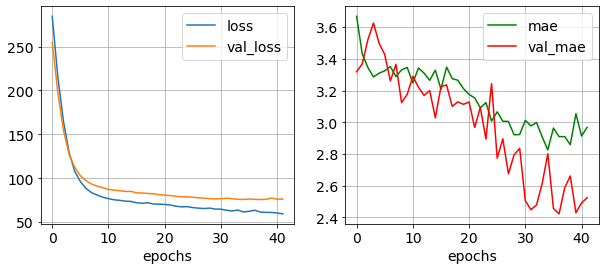

MAE: [2.45253324508667, 2.540184736251831, 2.514963150024414, 2.4792087078094482, 2.5245778560638428]
mean mae 2.5022935390472414


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 100
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

# Method 10: Change Optimizer from Adam to rmsprop
- activation = relu
- optimizer = rmsprop
- dropout rate = 0.5
- using Lasso Reg
- epochs = 100
- with Early Stopping (patience = 4)

In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01),input_shape=(X_test.shape[1],)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(1,activation='linear'))

  # compile model
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor ='val_loss',
                          min_delta=0,
                          patience = 4, # 5 rounds that val_loss never get lower, then stop training
                          verbose = 1)

This is round:1
Epoch 1/100
16/16 [==============================] - 2s 77ms/step - loss: 285.2663 - mae: 3.5090 - val_loss: 182.0615 - val_mae: 3.3330
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 195.8318 - mae: 3.2260 - val_loss: 126.3679 - val_mae: 3.2162
Epoch 3/100
16/16 [==============================] - 1s 57ms/step - loss: 150.2257 - mae: 3.1695 - val_loss: 92.3558 - val_mae: 2.9849
Epoch 4/100
16/16 [==============================] - 1s 59ms/step - loss: 86.5851 - mae: 2.8079 - val_loss: 78.0376 - val_mae: 3.5476
Epoch 5/100
16/16 [==============================] - 1s 59ms/step - loss: 98.4754 - mae: 3.1229 - val_loss: 69.8200 - val_mae: 2.7261
Epoch 6/100
16/16 [==============================] - 1s 58ms/step - loss: 92.3288 - mae: 2.9257 - val_loss: 65.6188 - val_mae: 2.8480
Epoch 7/100
16/16 [==============================] - 1s 56ms/step - loss: 69.2232 - mae: 2.6999 - val_loss: 63.2806 - val_mae: 2.7177
Epoch 8/100
16/16 [======================

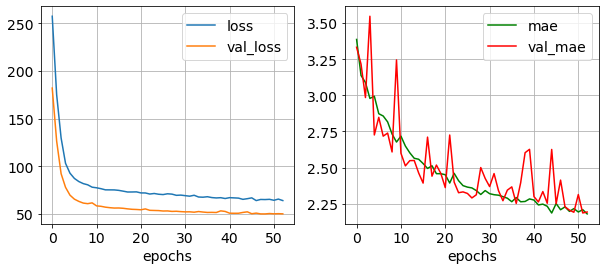

Round 2


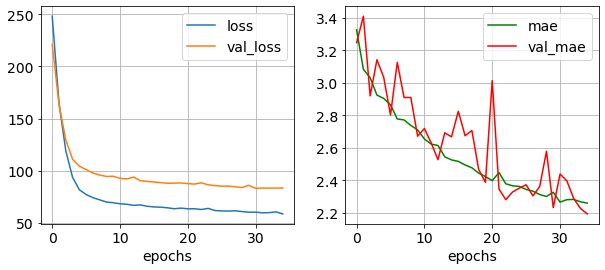

Round 3


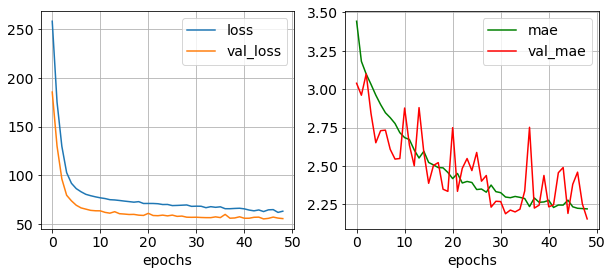

Round 4


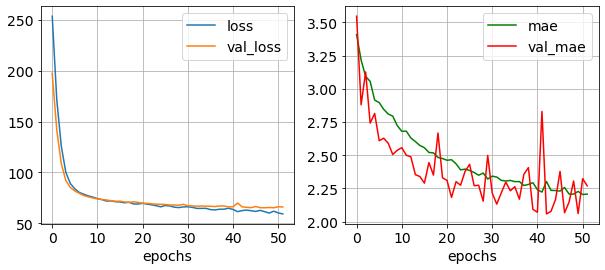

Round 5


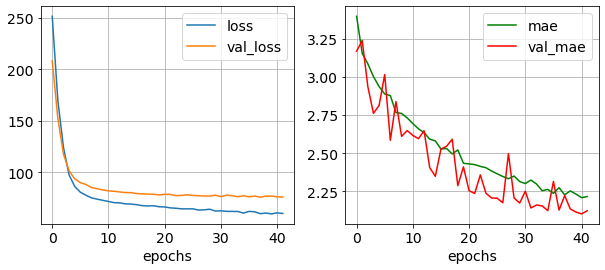

MAE: [2.192817449569702, 2.1925606727600098, 2.155735492706299, 2.2697665691375732, 2.1213274002075195]
mean mae 2.186441516876221


In [ ]:
import time
import keras
k_folds = 5
num_epochs = 100
batchSize = 512
all_scores_mae = list()
all_scores_mse = list()
history_performance = dict()
for k in range(k_folds):
  start_time = time.time()
  print('This is round:{}'.format(k+1))
  sample_val = train.shape[0]//k_folds
  # x_val and y_val
  validation = train[sample_val*k:(k+1)*sample_val]
  x_val = validation[X_columns]
  y_val = validation[['activity']]
  valid_index = validation.index

  
  # train set
  train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
  train_xy = train.iloc[train_index]
  X_train = train_xy[X_columns]
  y_train = train_xy[['activity']]
  
  # training model
  model = build_model()
  history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
  history_performance[k+1] = history.history
  val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
  print('validation mae:',val_mae)
  print('validation mse:',val_mse)
  all_scores_mae.append(val_mae)
  all_scores_mse.append(val_mse)
  print(' ')
  print("--- %s seconds ---" % (time.time() - start_time))
  print('----------------------------------------')
# Plotting Graph
for i in range(len(history_performance)):
  print('Round {}'.format(i+1))
  df_history = pd.DataFrame(history_performance[i+1])
  fig,ax = plt.subplots(1,2,figsize=(10,4))
  ax1 = plt.subplot(1,2,1)
  ax1.plot(df_history.index,df_history.loss,label='loss')
  ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
  ax1.set_xlabel('epochs')
  ax1.legend()
  ax1.grid()

  ax2 = plt.subplot(1,2,2)
  ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
  ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
  ax2.set_xlabel('epochs')
  ax2.grid()
  ax2.legend()
  plt.show()
# Mean MAE
print('MAE:',all_scores_mae)
print('mean mae',np.mean(all_scores_mae))

#### Notice that by changing optimizer from 'adam' to 'rmsprop'. Mean MAE improve. Now Mean MAE is at 2.18. However, the variation of val_mae is very high. we migth need to apply moving average technique with val_mae so that we can see the pattern clearly

# Method 11: change optimizer from rmsprop to SGD
- activation = relu
- dropout rate = 0.5
- using Lasso Reg
- epochs = 100
- with Early Stopping (patience = 4)

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01),input_shape=(X_test.shape[1],)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer=keras.optimizers.SGD(lr=0.01,decay=0.0001),loss='mse',metrics=['mae'])
#   return model

# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 4, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/100
16/16 [==============================] - 2s 70ms/step - loss: 331.4275 - mae: 3.7581 - val_loss: 285.1079 - val_mae: 3.4506
Epoch 2/100
16/16 [==============================] - 1s 52ms/step - loss: 282.8557 - mae: 3.1492 - val_loss: 270.3258 - val_mae: 2.8043
Epoch 3/100
16/16 [==============================] - 1s 52ms/step - loss: 273.3414 - mae: 2.8545 - val_loss: 256.6744 - val_mae: 2.8519
Epoch 4/100
16/16 [==============================] - 1s 54ms/step - loss: 282.3291 - mae: 2.9431 - val_loss: 264.8442 - val_mae: 5.1378
Epoch 5/100
16/16 [==============================] - 1s 51ms/step - loss: 277.1916 - mae: 3.3993 - val_loss: 233.2709 - val_mae: 2.6503
Epoch 6/100
16/16 [==============================] - 1s 52ms/step - loss: 257.2822 - mae: 2.8189 - val_loss: 226.6173 - val_mae: 2.5907
Epoch 7/100
16/16 [==============================] - 1s 52ms/step - loss: 232.7840 - mae: 2.6569 - val_loss: 212.9030 - val_mae: 2.5376
Epoch 8/100
16/16 [=============

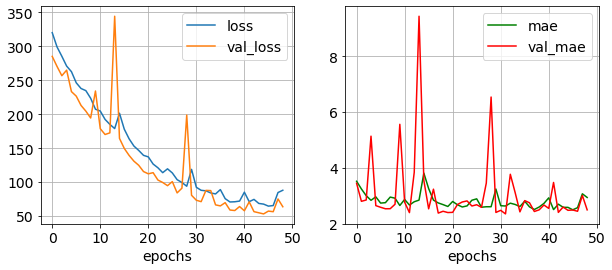

Round 2


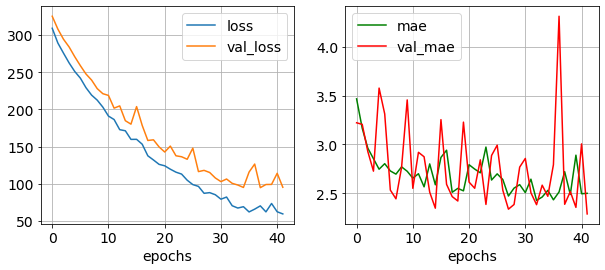

Round 3


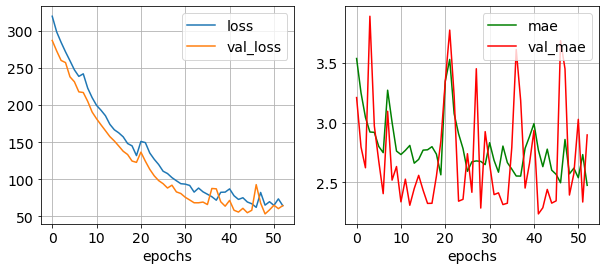

Round 4


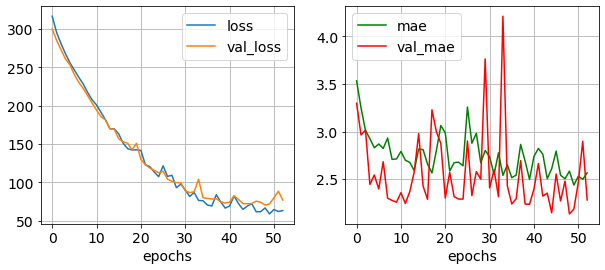

Round 5


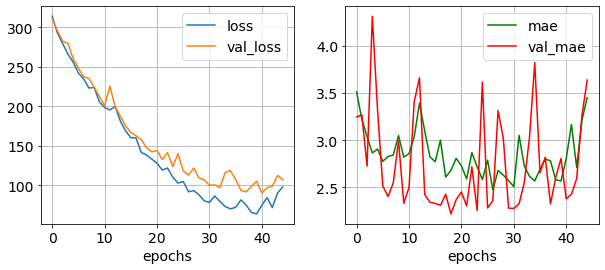

MAE: [2.498345375061035, 2.289041519165039, 2.8977794647216797, 2.280874490737915, 3.6389238834381104]
mean mae 2.7209929466247558


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 100
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

### Unacceptable because the val_mae is extremly high variated

# Method 12:  
- 2 hidden layers and 1 output layers
- activation = relu
- dropout rate = 0.5
- using Lasso Reg and Ridge
- epochs = 100
- optimizer = 'rmsprop'
- with Early Stopping (patience = 4)

In [ ]:
# from keras import models
# from keras import layers
# def build_model():
#   model = models.Sequential()
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01),input_shape=(X_test.shape[1],)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
#   model.add(layers.Dropout(rate=0.5))
#   model.add(layers.Dense(1,activation='linear'))

#   # compile model
#   model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
#   return model

# from keras.callbacks import EarlyStopping
# earlystop = EarlyStopping(monitor ='val_loss',
#                           min_delta=0,
#                           patience = 4, # 5 rounds that val_loss never get lower, then stop training
#                           verbose = 1)

This is round:1
Epoch 1/100
16/16 [==============================] - 2s 73ms/step - loss: 291.0097 - mae: 3.6671 - val_loss: 183.1772 - val_mae: 3.0468
Epoch 2/100
16/16 [==============================] - 1s 56ms/step - loss: 208.4480 - mae: 3.2871 - val_loss: 127.5695 - val_mae: 2.9266
Epoch 3/100
16/16 [==============================] - 1s 54ms/step - loss: 166.1110 - mae: 3.3317 - val_loss: 93.6441 - val_mae: 2.8139
Epoch 4/100
16/16 [==============================] - 1s 57ms/step - loss: 107.4241 - mae: 2.8442 - val_loss: 76.6793 - val_mae: 2.8701
Epoch 5/100
16/16 [==============================] - 1s 57ms/step - loss: 83.4431 - mae: 2.9583 - val_loss: 70.5508 - val_mae: 3.1819
Epoch 6/100
16/16 [==============================] - 1s 57ms/step - loss: 82.6179 - mae: 2.8929 - val_loss: 70.3166 - val_mae: 3.7031
Epoch 7/100
16/16 [==============================] - 1s 55ms/step - loss: 82.0390 - mae: 3.0753 - val_loss: 63.6227 - val_mae: 2.6747
Epoch 8/100
16/16 [=====================

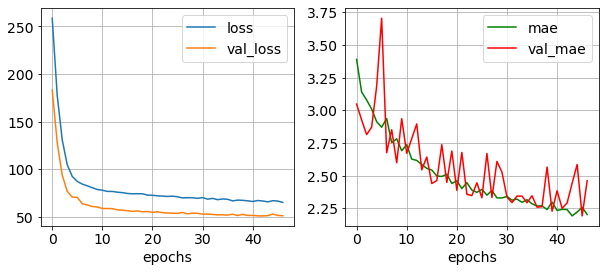

Round 2


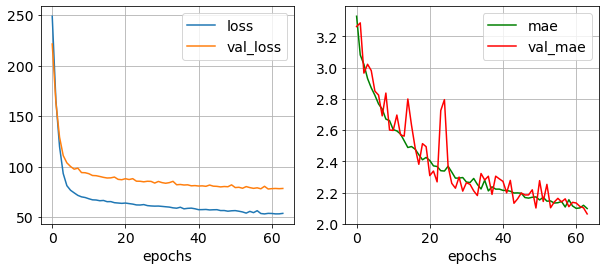

Round 3


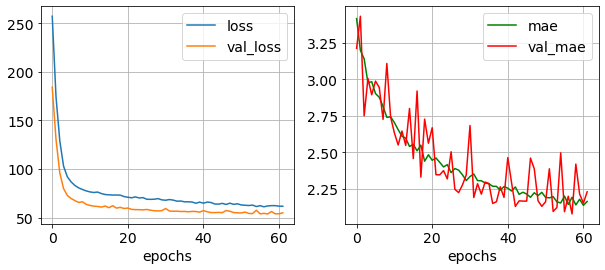

Round 4


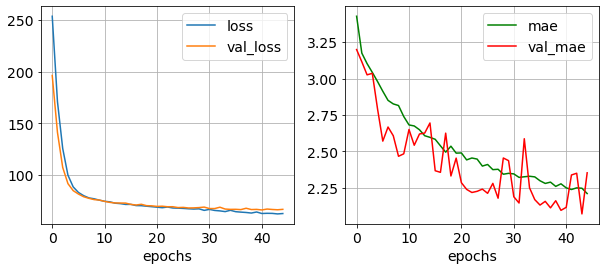

Round 5


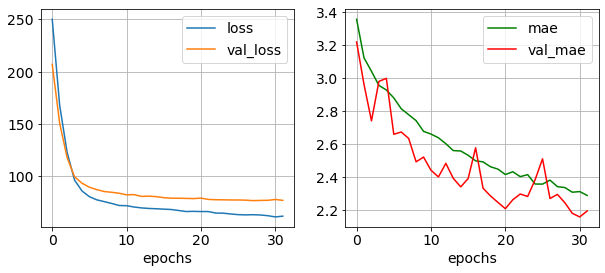

MAE: [2.4610440731048584, 2.0629942417144775, 2.231365203857422, 2.3518054485321045, 2.1934454441070557]
mean mae 2.2601308822631836


In [ ]:
# import time
# import keras
# k_folds = 5
# num_epochs = 100
# batchSize = 512
# all_scores_mae = list()
# all_scores_mse = list()
# history_performance = dict()
# for k in range(k_folds):
#   start_time = time.time()
#   print('This is round:{}'.format(k+1))
#   sample_val = train.shape[0]//k_folds
#   # x_val and y_val
#   validation = train[sample_val*k:(k+1)*sample_val]
#   x_val = validation[X_columns]
#   y_val = validation[['activity']]
#   valid_index = validation.index

  
#   # train set
#   train_index = [i for i in range(0,train.shape[0]) if i not in valid_index]
#   train_xy = train.iloc[train_index]
#   X_train = train_xy[X_columns]
#   y_train = train_xy[['activity']]
  
#   # training model
#   model = build_model()
#   history = model.fit(X_train,y_train,batch_size = batchSize, epochs = num_epochs,validation_data=(x_val,y_val),verbose=1,callbacks=[earlystop])
#   history_performance[k+1] = history.history
#   val_mse, val_mae = model.evaluate(x_val,y_val,verbose = 0)
#   print('validation mae:',val_mae)
#   print('validation mse:',val_mse)
#   all_scores_mae.append(val_mae)
#   all_scores_mse.append(val_mse)
#   print(' ')
#   print("--- %s seconds ---" % (time.time() - start_time))
#   print('----------------------------------------')
# # Plotting Graph
# for i in range(len(history_performance)):
#   print('Round {}'.format(i+1))
#   df_history = pd.DataFrame(history_performance[i+1])
#   fig,ax = plt.subplots(1,2,figsize=(10,4))
#   ax1 = plt.subplot(1,2,1)
#   ax1.plot(df_history.index,df_history.loss,label='loss')
#   ax1.plot(df_history.index,df_history.val_loss,label='val_loss')
#   ax1.set_xlabel('epochs')
#   ax1.legend()
#   ax1.grid()

#   ax2 = plt.subplot(1,2,2)
#   ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
#   ax2.plot(df_history.index,df_history.val_mae,label='val_mae',color='red')
#   ax2.set_xlabel('epochs')
#   ax2.grid()
#   ax2.legend()
#   plt.show()
# # Mean MAE
# print('MAE:',all_scores_mae)
# print('mean mae',np.mean(all_scores_mae))

# In summary
### I found that method 10 provides the most preferable results since val_mae is roughly 2.10 and the model didn't become quickly overfitted. Therefore, I would select Method 10 to be evaluated with testing data

Method 10: 
- activation = relu
- optimizer = rmsprop
- dropout rate = 0.5
- using Lasso Reg and Ridge Regression
- epochs = 100
- with Early Stopping (patience = 4)

# **Step8**: Evaluate neural network model after tuning hyperparameters
- Selecting method 10

In [ ]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01),input_shape=(X_test.shape[1],)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01)))
  model.add(layers.Dropout(rate=0.5))
  model.add(layers.Dense(1,activation='linear'))

  # compile model
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor ='val_loss',
                          min_delta=0,
                          patience = 4, # 5 rounds that val_loss never get lower, then stop training
                          verbose = 1)

Epoch 1/100
20/20 [==============================] - 2s 69ms/step - loss: 277.0079 - mae: 3.5905 - val_loss: 181.5927 - val_mae: 3.2125
Epoch 2/100
20/20 [==============================] - 1s 53ms/step - loss: 170.5458 - mae: 3.0763 - val_loss: 120.8274 - val_mae: 3.1401
Epoch 3/100
20/20 [==============================] - 1s 53ms/step - loss: 106.6710 - mae: 2.8903 - val_loss: 91.8295 - val_mae: 3.0496
Epoch 4/100
20/20 [==============================] - 1s 53ms/step - loss: 94.5083 - mae: 2.9878 - val_loss: 81.0958 - val_mae: 3.0244
Epoch 5/100
20/20 [==============================] - 1s 53ms/step - loss: 92.3873 - mae: 2.9497 - val_loss: 78.9974 - val_mae: 2.8266
Epoch 6/100
20/20 [==============================] - 1s 55ms/step - loss: 73.6363 - mae: 2.7021 - val_loss: 73.1532 - val_mae: 2.9497
Epoch 7/100
20/20 [==============================] - 1s 54ms/step - loss: 65.8330 - mae: 2.6930 - val_loss: 72.6573 - val_mae: 2.7705
Epoch 8/100
20/20 [==============================] - 1s 5

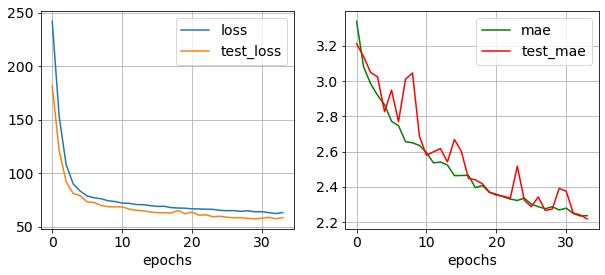

test mae: 2.218210458755493
test mse: 58.601776123046875


In [ ]:
X_train = train.loc[:,X_columns]
y_train = train.loc[:,'activity']
model = build_model()

num_epochs = 100
batchSize = 512

history = model.fit(X_train,y_train,batch_size = batchSize, validation_data = (X_test,y_test) ,epochs = num_epochs,verbose=1,callbacks=[earlystop])

# evaluate model
test_mse, test_mae = model.evaluate(X_test,y_test,verbose = 0)


df_history = pd.DataFrame(history.history)
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax1 = plt.subplot(1,2,1)
ax1.plot(df_history.index,df_history.loss,label='loss')
ax1.plot(df_history.index,df_history.val_loss,label='test_loss')
ax1.set_xlabel('epochs')
ax1.legend()
ax1.grid()

ax2 = plt.subplot(1,2,2)
ax2.plot(df_history.index,df_history.mae,label='mae',color='green')
ax2.plot(df_history.index,df_history.val_mae,label='test_mae',color='red')
ax2.set_xlabel('epochs')
ax2.grid()
ax2.legend()
plt.show()

print('test mae:',test_mae)
print('test mse:',test_mse)

# **Step9**: Predict new data with tuned model
  - predict first five samples

In [ ]:
Num_data_for_prediction = 5
X_newData = df.head(Num_data_for_prediction) 
True_activity = X_newData['activity']
X_newData

,activity,Uppm,adjwt,lat,lon,pcterr,rep,room,startdt,starttm,stopdt,stoptm,basement_b'N',basement_b'Y',cntyfips_1,cntyfips_3,cntyfips_5,cntyfips_7,cntyfips_9,cntyfips_11,cntyfips_12,cntyfips_13,cntyfips_15,cntyfips_17,cntyfips_19,cntyfips_21,cntyfips_23,cntyfips_25,cntyfips_27,cntyfips_29,cntyfips_31,cntyfips_33,cntyfips_35,cntyfips_37,cntyfips_39,cntyfips_41,cntyfips_43,cntyfips_45,cntyfips_47,cntyfips_49,...,wave_103,wave_104,wave_105,wave_106,wave_107,wave_108,wave_109,wave_110,wave_111,wave_112,wave_113,wave_114,wave_115,wave_116,wave_117,wave_118,wave_119,wave_120,wave_121,wave_122,wave_123,wave_124,wave_125,wave_126,wave_127,wave_128,wave_129,wave_130,wave_131,wave_132,wave_133,wave_134,wave_135,wave_136,wave_137,wave_138,wave_139,wave_140,zipflag_0,zipflag_1
0,1.6,0.726155,-0.581888,-0.029971,0.334165,-0.044801,0.140030,-0.697079,-0.891380,1.770561,-0.903446,1.680747,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.5,0.956498,-0.417488,-1.608249,-1.917976,-1.009363,1.335392,-0.697079,-0.555491,-1.174687,-0.563236,-0.806374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.0,0.638017,0.173780,0.308978,1.454622,-0.272650,-1.055332,-0.697079,-0.267560,-0.822606,-0.271601,-0.826677,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.6,0.638017,0.047318,0.308978,1.454622,1.086851,0.140030,-0.106878,-0.261562,-1.455086,-0.265525,-0.420616,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.2,0.191123,-0.277720,-0.536450,-0.426190,0.775457,0.140030,0.483323,-0.267560,-1.655372,-0.271601,-1.618495,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_newData = df.iloc[0:len(X_newData),1:] # Exclude activity

In [ ]:
predict = model.predict(X_newData).reshape(-1,1)
predict

array([[1.9398384],
       [2.3005972],
       [2.3391936],
       [1.0082467],
       [1.0251489]], dtype=float32)

In [ ]:
prediction = pd.DataFrame(True_activity)
prediction['predict_activity'] = predict
prediction['Diff'] = abs(prediction['activity']-prediction['predict_activity'])
prediction 

,activity,predict_activity,Diff
0,1.6,1.939838,0.339838
1,0.5,2.300597,1.800597
2,3.0,2.339194,0.660806
3,0.6,1.008247,0.408247
4,1.2,1.025149,0.174851
